# SHAP Interpretation

In [1]:
import shap
import pandas as pd
import keras
from sklearn.preprocessing import *
import numpy as np
Minmaxsc  = MinMaxScaler(feature_range=(0, 1))
Minmaxsc2  = MinMaxScaler(feature_range=(0, 1))
Stdsc  = StandardScaler()
Stdsc2  = StandardScaler()
MAsc  = MaxAbsScaler()
MAsc2  = MaxAbsScaler()
Rsc  = RobustScaler()
Rsc2  = RobustScaler()

In [2]:
database=pd.read_csv('processed_database.csv')
data_output_full=database.iloc[:,1]
data_input_full=database.iloc[:,2:]
data_input_full_ANN=Stdsc.fit_transform(data_input_full)
data_output_full_ANN=Stdsc2.fit_transform(np.array(data_output_full).reshape(-1,1))

In [3]:
data_input_full_ANN_for_shap=pd.DataFrame(data_input_full_ANN,columns=data_input_full.columns)

In [4]:
model=keras.models.load_model("Acid_HER.h5")

In [5]:
from keras.models import load_model
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import plot_partial_dependence
from sklearn.utils.validation import check_is_fitted

# Define a new class that inherits from sklearn's base estimator classes.
class KerasPDPWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model
        self.fitted_ = True  # Indicate that the model is already fitted
    def fit(self, X, y=None):
        # Do nothing, the model is already trained
        return self
    def predict(self, X, y=None):
        return self.model.predict(X)

# Create an instance of the wrapper with the Keras model.
PDP_model = load_model("Acid_HER.h5")
PDP_wrapped_model = KerasPDPWrapper(PDP_model)


In [6]:
# compute SHAP values
explainer = shap.Explainer(model, data_input_full_ANN)
shap_values = explainer(data_input_full_ANN_for_shap)

Permutation explainer: 1252it [00:48, 21.42it/s]                                                                       


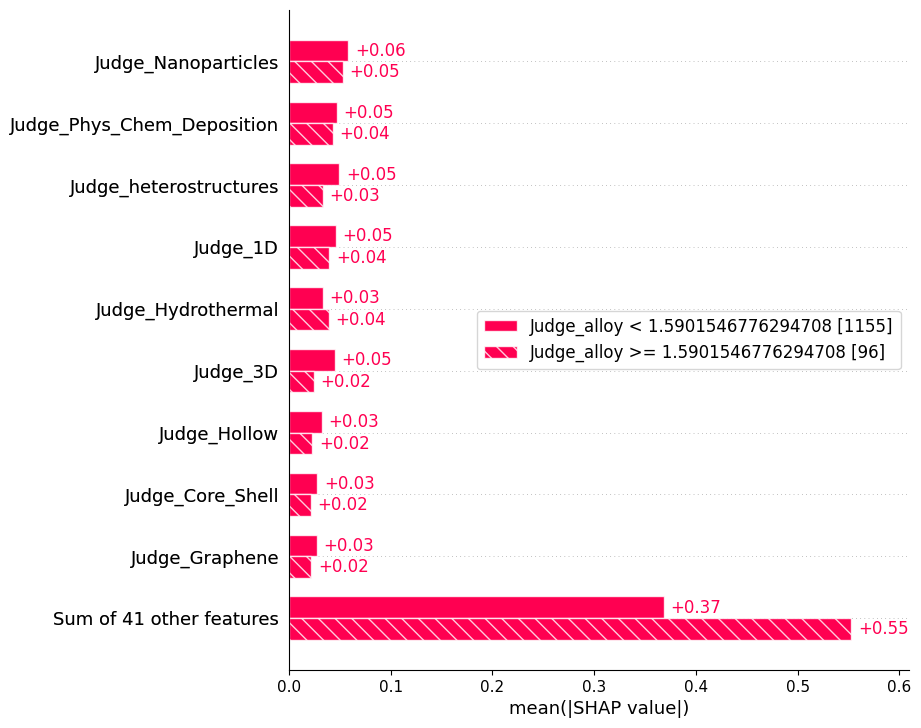

In [7]:
# Extract the values from the 64th feature onwards
sliced_values = shap_values.values[:, 64:]

# Create a new Explanation object with the sliced values
sliced_shap_values = shap.Explanation(values=sliced_values, data=shap_values.data[:, 64:], feature_names=shap_values.feature_names[64:])

# Calculate the absolute mean
cohorts = sliced_shap_values.cohorts(2).abs.mean(0)

# Create the bar plot
shap.plots.bar(cohorts)

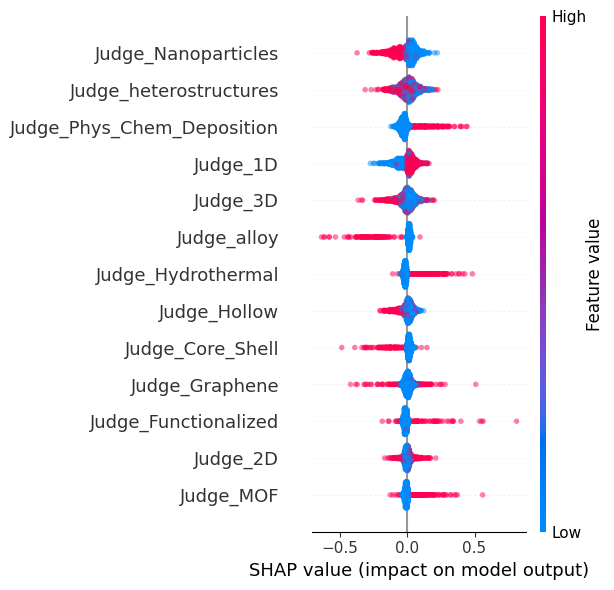

In [8]:
shap.summary_plot(shap_values[:,64:],feature_names=list(data_input_full.columns)[64:],max_display=13,alpha=0.5,plot_size=[6,6])

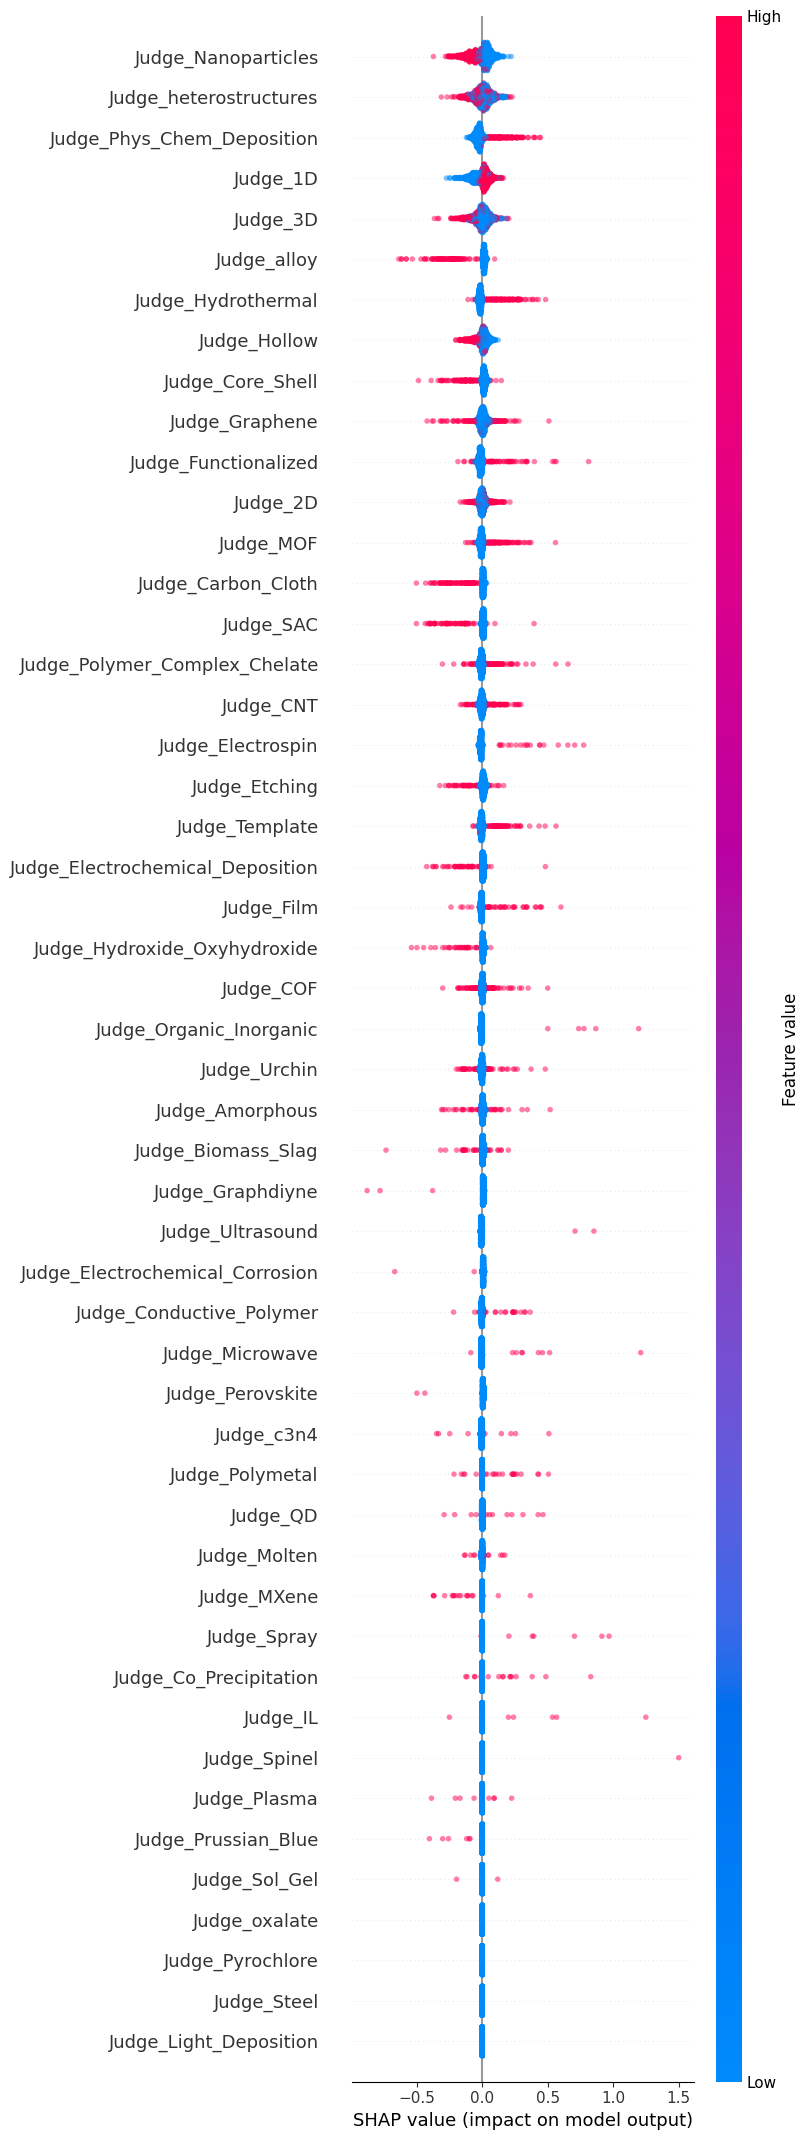

In [9]:
shap.summary_plot(shap_values[:,64:],feature_names=list(data_input_full.columns)[64:],max_display=100,alpha=0.5)

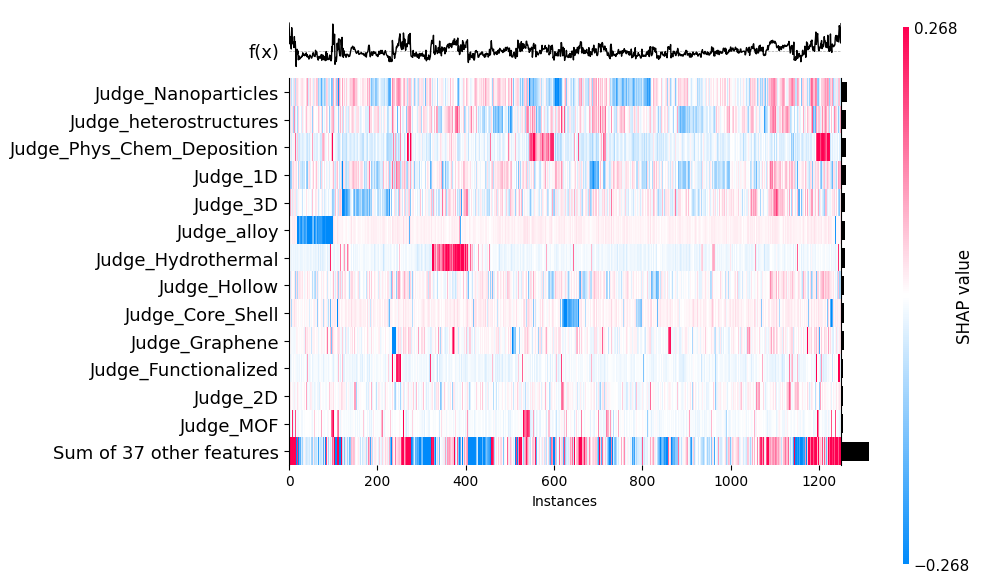

In [10]:
# shap.summary_plot(shap_values[:,64:],feature_names=list(data_input_full.columns)[64:],max_display=15,alpha=0.5)
shap.plots.heatmap(shap_values[:,64:],max_display=14)

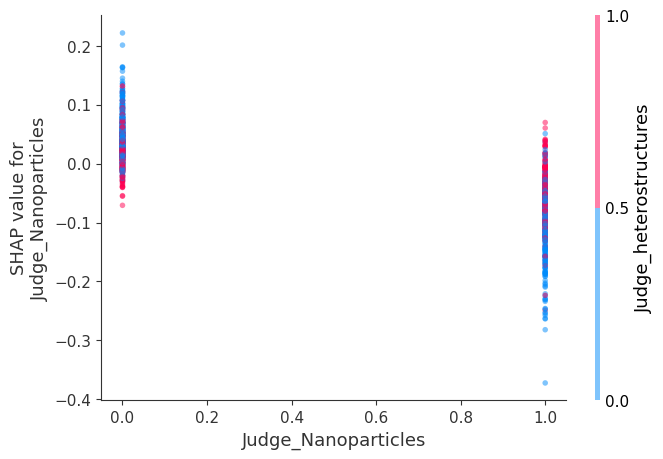

40/40 [==============================] - 0s 615us/step


Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


40/40 [==============================] - 0s 534us/step


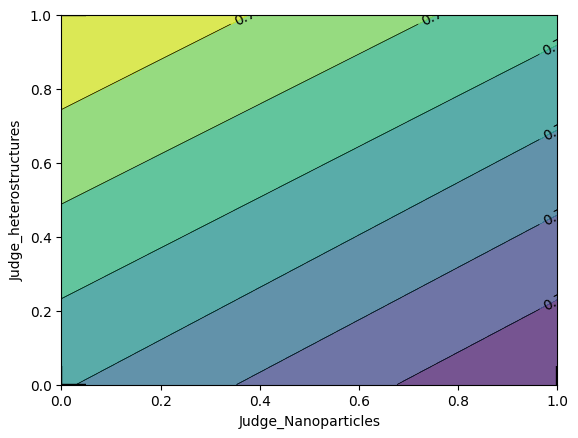

In [11]:
shap.dependence_plot('Judge_Nanoparticles',shap_values.values,data_input_full,interaction_index='Judge_heterostructures',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_Nanoparticles','Judge_heterostructures')],grid_resolution=50)

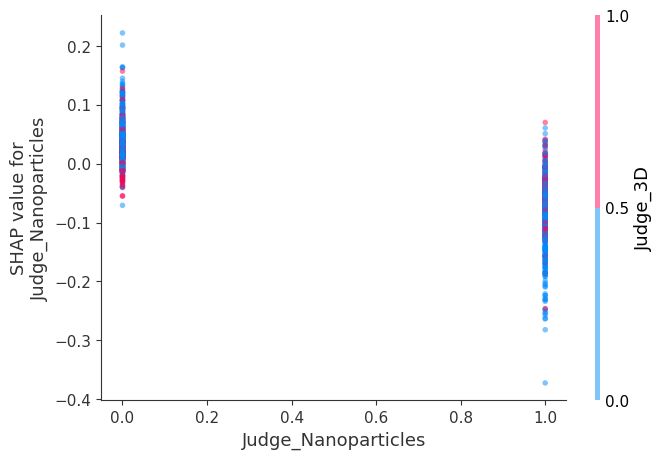

 1/40 [..............................] - ETA: 0s

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


40/40 [==============================] - 0s 513us/step


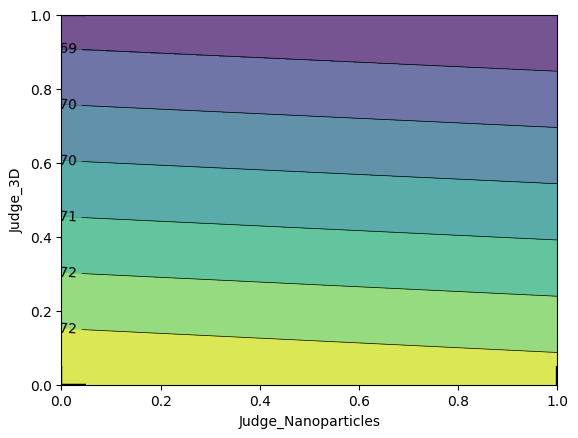

In [12]:
shap.dependence_plot('Judge_Nanoparticles',shap_values.values,data_input_full,interaction_index='Judge_3D',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_Nanoparticles','Judge_3D')],grid_resolution=50)

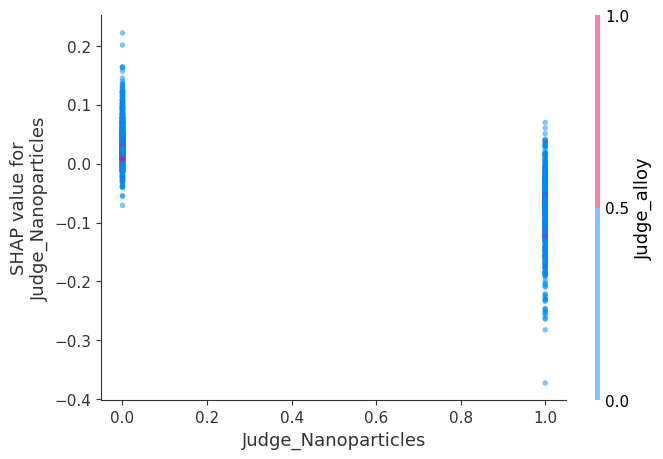

40/40 [==============================] - 0s 538us/step


Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


40/40 [==============================] - 0s 462us/step


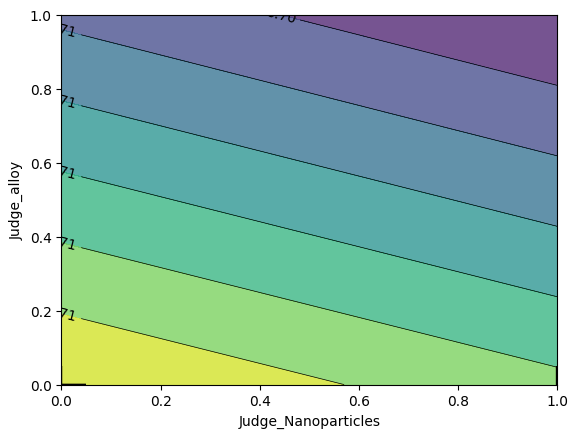

In [13]:
shap.dependence_plot('Judge_Nanoparticles',shap_values.values,data_input_full,interaction_index='Judge_alloy',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_Nanoparticles','Judge_alloy')],grid_resolution=50)

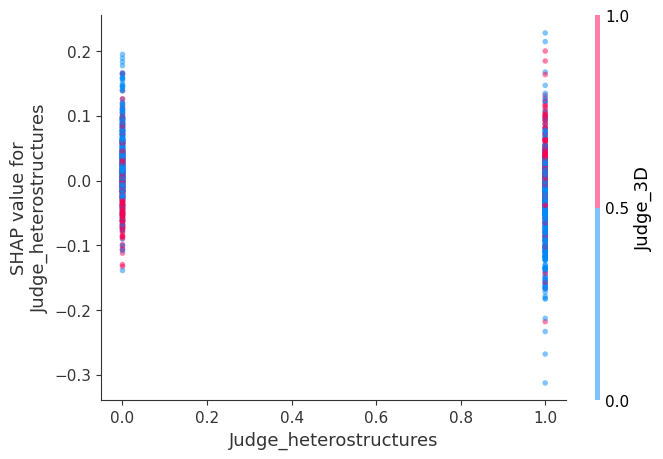

40/40 [==============================] - 0s 641us/step


Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


40/40 [==============================] - 0s 538us/step


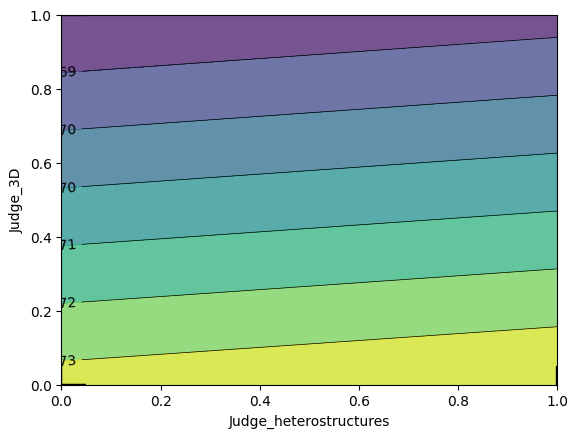

In [19]:
shap.dependence_plot('Judge_heterostructures',shap_values.values,data_input_full,interaction_index='Judge_3D',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_heterostructures','Judge_3D')],grid_resolution=50)

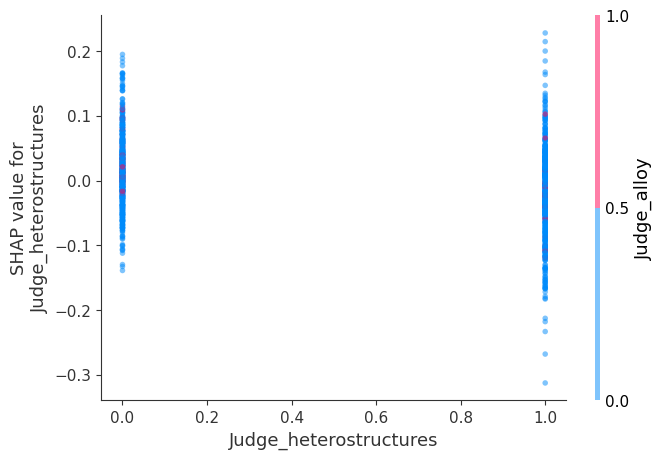

40/40 [==============================] - 0s 513us/step


Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


40/40 [==============================] - 0s 475us/step


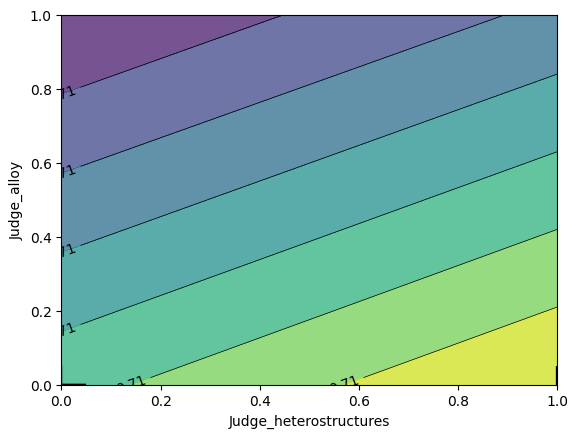

In [18]:
shap.dependence_plot('Judge_heterostructures',shap_values.values,data_input_full,interaction_index='Judge_alloy',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_heterostructures','Judge_alloy')],grid_resolution=50)

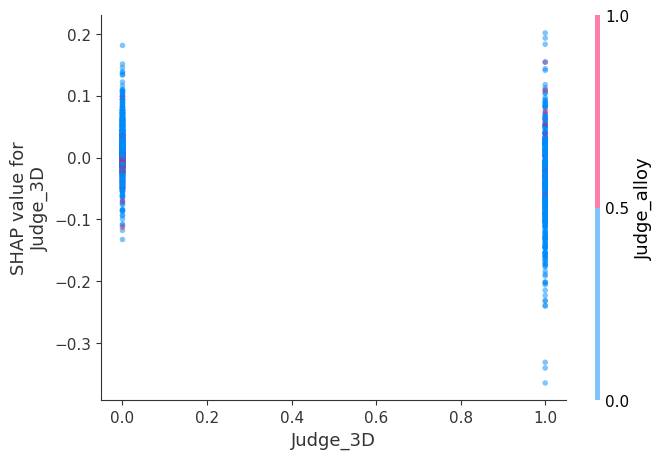

40/40 [==============================] - 0s 462us/step


Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


40/40 [==============================] - 0s 487us/step


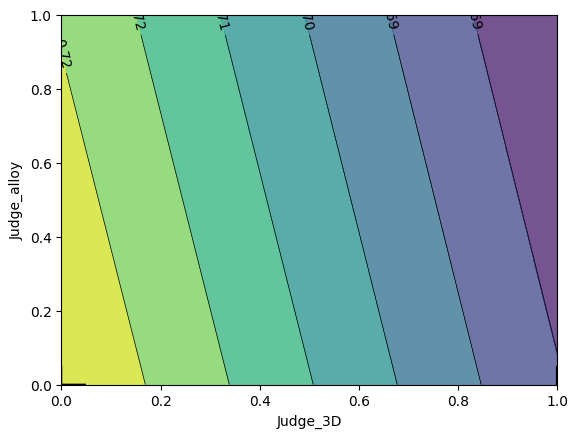

In [16]:
shap.dependence_plot('Judge_3D',shap_values.values,data_input_full,interaction_index='Judge_alloy',alpha=0.5)
# Plot the partial dependence.
plot_partial_dependence(PDP_wrapped_model, data_input_full, [('Judge_3D','Judge_alloy')], grid_resolution=50)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
 50%|████████████████████████████████████████▌                                        | 57/114 [01:22<01:30,  1.59s/it]No/low signal found from feature 56 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 57 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 58 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 59 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/l

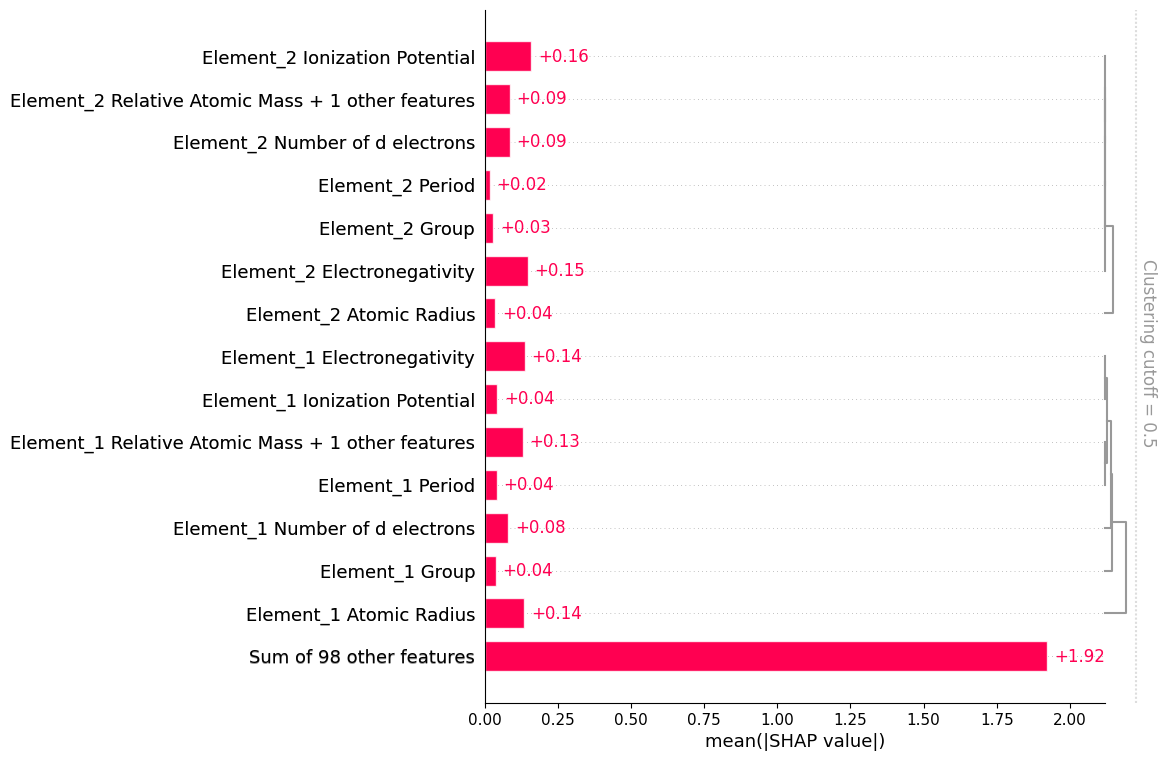

In [17]:
#####clustered plot#####
clustering = shap.utils.hclust(data_input_full_ANN, data_output_full_ANN) 
shap.plots.bar(shap_values, max_display=15,clustering=clustering,clustering_cutoff=0.5)

In [ ]:
from sklearn.inspection import partial_dependence
def compute_pdp_importances(model, X):
    pdp_importances = []
    for feature_idx in range(X.shape[1]):
        pdp_results, _ = partial_dependence(model, X, [feature_idx], grid_resolution=50)
        pdp_range = np.max(pdp_results) - np.min(pdp_results)
        pdp_importances.append(pdp_range)
    return np.array(pdp_importances)

In [ ]:
import matplotlib.pyplot as plt
# Compute PDP importances
pdp_importances = compute_pdp_importances(PDP_wrapped_model, data_input_full_ANN_for_shap)

# Create a DataFrame to pair importances with feature names
importances_df = pd.DataFrame({
    'feature': data_input_full_ANN_for_shap.columns,
    'importance': pdp_importances
})

# Filter for only features after the 64th
importances_df = importances_df.iloc[64:]

# Sort importances
importances_df = importances_df.sort_values(by='importance')

# Plot
plt.figure(figsize=(9, 18))
plt.barh(range(importances_df.shape[0]), importances_df['importance'])
plt.yticks(range(importances_df.shape[0]), importances_df['feature'])
plt.xlabel('Partial Dependence Importance')
plt.show()